### <span style="color:#32CD32">***Introduction***</span>

Healthcare quality standards and operational efficiency measure their effectiveness through hospital readmission metrics. Health care organizations face multiple challenges when patient readmission reaches high levels due to poor care and increased expenses that put a strain on hospital resources. Studies of readmission factors enable healthcare facilities to deploy prevention methods that enhance both patient results and hospital resource management.

The research intends to identify patient attributes and the influence of clinical characteristics and therapeutic factors on hospital admission and discharge processes. Our research utilizes machine learning regression methods to discover important causes of hospital readmissions while determining effective strategies for hospitals to prevent these preventable readmissions.

### <span style="color:#32CD32">***Problem Statement***</span>

Medical facilities face major difficulties when patients require repeated hospital admissions because these situations cause elevated costs and negative healthcare outcomes. Medical officials need to comprehend root socio-demographic elements alongside clinical aspects which drive hospital readmissions to enhance care quality and decrease avoidable hospital visits. The goal of this project is to create a forecasting model which assesses readmission probabilities through analyzing patient demographics together with diagnosis records along with previous medical treatments and clinical hospital stay data.

### <span style="color:#32CD32">***Business Statement***</span>

For healthcare institutions, reducing hospital readmission rates is not just a regulatory requirement but a crucial element in improving overall healthcare quality, optimizing resource management, and minimizing financial burdens. High readmission rates often indicate gaps in patient care, inadequate discharge planning, or underlying health conditions that were not effectively managed during the initial hospital stay. These readmissions can lead to increased healthcare costs, unnecessary strain on hospital capacity, and diminished patient satisfaction.

By leveraging predictive analytics and machine learning, hospitals can proactively identify high-risk patients and implement targeted interventions tailored to their specific needs. This includes enhanced post-discharge follow-ups, personalized treatment plans, medication adherence monitoring, and patient education initiatives. Additionally, understanding the key drivers behind readmissions allows healthcare providers to refine clinical workflows, improve coordination between departments, and ensure timely access to outpatient care.

A data-driven approach not only enhances patient outcomes by reducing preventable readmissions but also supports hospitals in meeting regulatory benchmarks, improving operational efficiency, and ensuring sustainable healthcare delivery. By integrating predictive modeling into decision-making processes, hospitals can shift from reactive to proactive patient management, ultimately fostering a more effective, cost-efficient, and patient-centered healthcare system.

### <span style="color:#32CD32">***Objectives***</span>


1. **Develop a Predictive Model** – Build a machine learning regression model that estimates the likelihood of patient readmission based on provided patient data. The model will utilize structured healthcare data, including patient demographics, medical history, diagnosis codes, and prescribed medications.  

2. **Identify Key Features** – Determine the most influential factors contributing to hospital readmissions. Some features, such as patient demographics and medical history, are crucial for understanding general hospital intake, while others, such as the number of lab procedures, inpatient visits, and specific medication use, are critical for predicting readmission risk. Identifying these key factors will enhance model performance and provide actionable insights for healthcare providers.  

3. **Perform Exploratory Data Analysis (EDA) and Feature Visualizations** – Conduct thorough data exploration and visualization to understand the distribution of features, detect missing values, and identify patterns associated with patient readmission. EDA will help in feature selection, transformation, and engineering for better model performance.  

4. **Enhance Patient Care Strategies** – Utilize insights from features such as the number of medications, prior hospital visits, and lab test results to create personalized follow-up care plans. For instance, patients with frequent hospital visits or multiple prescribed medications may require more intensive post-discharge monitoring to reduce readmission risks.  

5. **Support Clinical Decision-Making** – Provide healthcare professionals with data-driven insights to improve patient management. By leveraging predictive analytics, medical teams can proactively identify patients at high risk of readmission and implement timely interventions.  

6. **Evaluate Model Performance** – Assess the accuracy and reliability of the regression model using key performance metrics such as RMSE, R² score, and mean absolute error (MAE). A thorough evaluation will ensure that the model is robust and generalizable to unseen patient data.  

7. **Generate Recommendations and Conclusions** – Derive meaningful insights from the feature analysis and model results to offer actionable recommendations. This may include identifying high-risk patient groups, suggesting policy changes, or refining hospital intake processes to minimize unnecessary readmissions.  

8. **Optimize Discharge Planning** – Develop strategies to improve discharge and post-discharge care by analyzing key factors such as admission type, discharge disposition, and patient demographics. These insights can help hospitals design better transition care plans to prevent readmissions.  


<hr style="border: 1px solid green;">

### <span style="color:#32CD32">***Data Understanding***</span>

#### <span style="color:Green">*Data Importation, Inspection and Reviews*</span>

In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv(r"N:\Moringa\afterM\joseline 001\Diabetes_130-US_Hospitals_1999-2008\diabetic_data.csv")
df2 = pd.read_csv(r"N:\Moringa\afterM\joseline 001\Diabetes_130-US_Hospitals_1999-2008\IDS_mapping.csv")
df1.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


In [2]:
df2.head(3)

,admission_type_id,admission_type_id desc,discharge_disposition_id,discharge_disposition_id desc,admission_source_id,admission_source_id desc
0,1.0,Emergency,1,Discharged to home,1.0,Physician Referral
1,2.0,Urgent,2,Discharged/transferred to another short term h...,2.0,Clinic Referral
2,3.0,Elective,3,Discharged/transferred to SNF,3.0,HMO Referral


In [3]:
df1.shape

(101766, 50)

In [4]:
#The info() function in pandas provides a concise summary of a DataFrame. It is useful for quickly understanding the structure and basic properties of our dataset.
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

From this we can review the data types , non-NaN valued columns and the index range. non-NaN helps know the approach for cleaning and the dtypes makes easy during column categorisation 

In [5]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


The dataset provides an in-depth explanation of each column, as detailed in the [column description](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-20). To refine our analysis, we will compute a correlation matrix to examine the relationships between the features and the target variable, `readmitted`. Based on the correlation weights of the independent variables with respect to the `column` `readmitted`, we will systematically decide which features to retain and which to drop for further modeling and analysis.



#### <span style="color:Green">*Undestanding target variable*</span>

In [6]:
#Check the Data Type
(df1['readmitted'].dtype)

dtype('O')

In [7]:
#Target variable Class Distribution.
df1['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


`readmitted` column has three unique categories:

- "NO" (Patients not readmitted) 
- ">30" (Readmitted after more than 30 days) 
- "<30" (Readmitted within 30 days) 

From this we can clearly tell of Class Imbalance

<Axes: ylabel='count'>

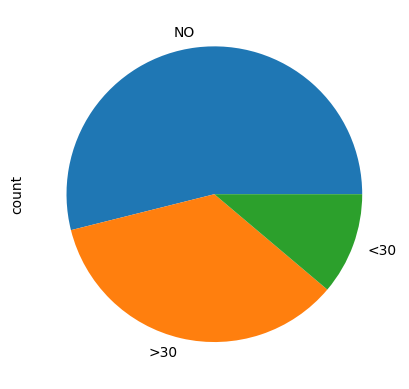

In [8]:
#Visualise dtype '0' with barplot
(df1['readmitted'].value_counts().plot(kind='pie'))

In [9]:
#encoding for ML models
df1['readmitted'] = df1['readmitted'].map({'NO': 0, '>30': 1, '<30' : 2})
df1['readmitted'].value_counts()

readmitted
0    54864
1    35545
2    11357
Name: count, dtype: int64

<hr style="border: 1px solid green;">

### <span style="color:#32CD32">***Data Cleaning***</span>

#### <span style="color:green">*handling missing vales*</span>

In [10]:
df1.isna().mean()[df1.isna().mean() >0 ]*100 #gets a total percentage of missing data 

max_glu_serum    94.746772
A1Cresult        83.277322
dtype: float64

The columns `max_glu_serum` and `A1Cresult` have a high percentage of missing values (94.75% and 83.28%, respectively) and indicates a large percentage of missing values and it wont be logical to fill with any method 

In [11]:
df1.drop(columns=['max_glu_serum','A1Cresult'],axis=1,inplace=True)

In [12]:
df1.dropna(inplace=True)

#### <span style='color:green'>*Handle Duplicates*</span>

In [13]:
df1.duplicated().sum() #to know the dup count
df1.drop_duplicates(inplace=True)

<hr style="border: 1px solid green;">

### <span style="color:#32CD32">***Exploratory Data Analysis***</span>

#### <span style='color:green'>*Visualizing Feature Relationships*</span>

##### <span style='color:green'>*Pairplot (Visualizing Feature Interactions)*</span>

Number of rows in df1: 101766


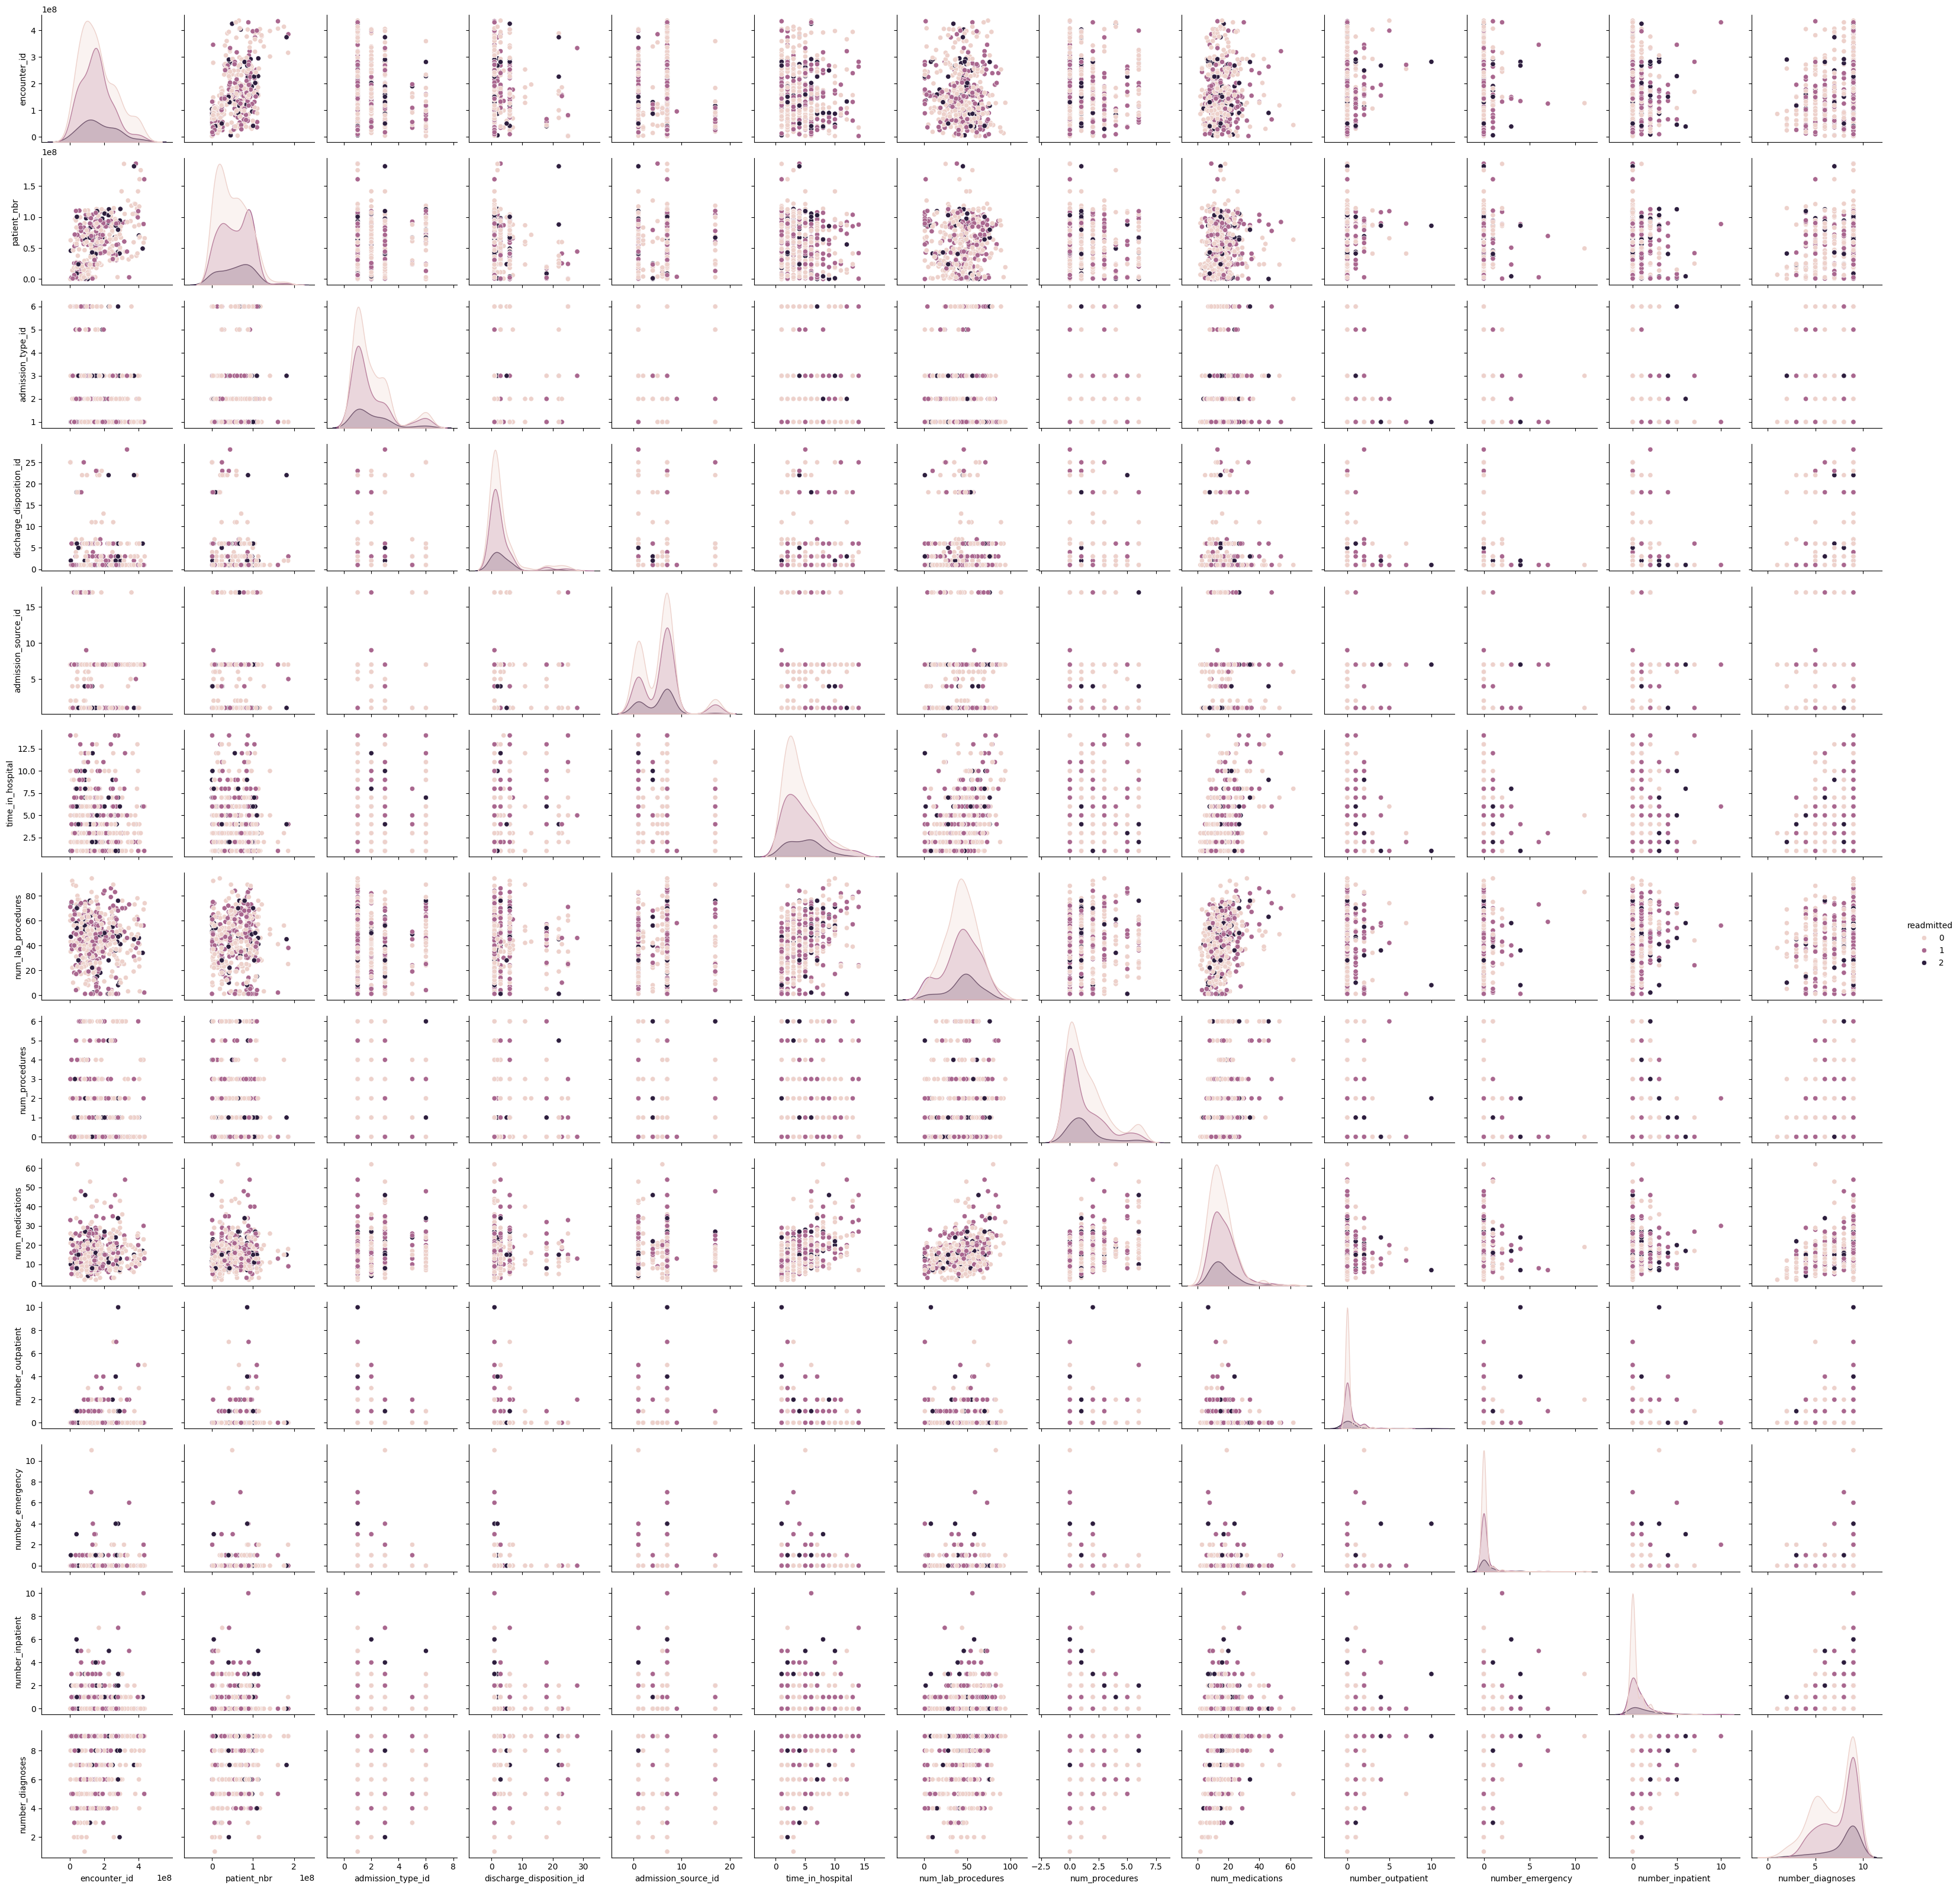

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the number of rows in df1
print(f"Number of rows in df1: {len(df1)}")

# Adjust sample size to avoid the error
sample_size = min(500, len(df1))  # Use 500 or the number of rows, whichever is smaller
sns.pairplot(df1.sample(sample_size), hue="readmitted")
plt.show()


##### <span style='color:green'>*Compare Means of Important Features*</span>

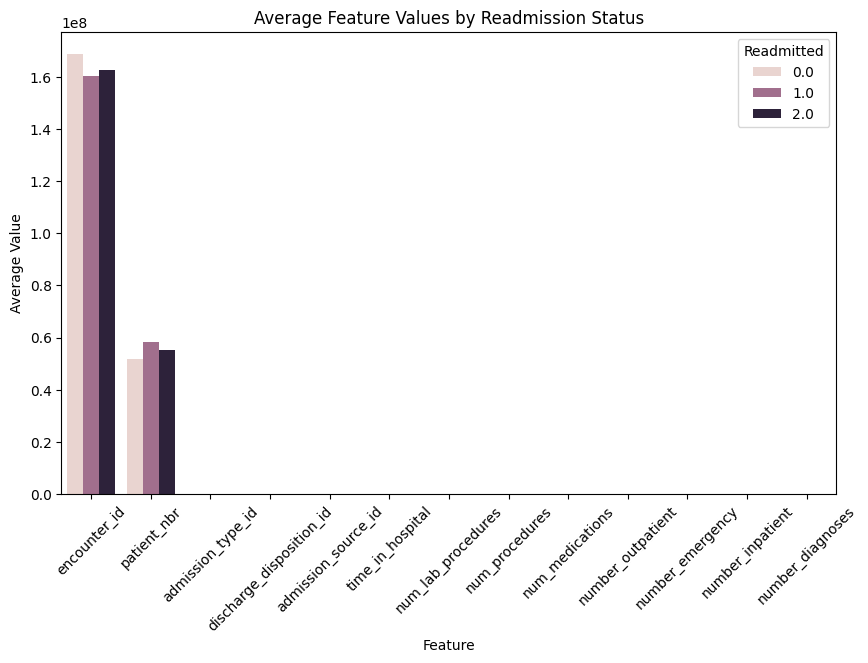

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numeric columns
numeric_columns = df1.select_dtypes(include=['number']).columns

# Group by 'readmitted' and calculate the mean for numeric columns
result = df1.groupby('readmitted')[numeric_columns].mean()

# Check if 'readmitted' is already a column
if 'readmitted' not in result.columns:
    result = result.reset_index()  

# Melt the DataFrame for easier plotting with seaborn
result_melted = result.melt(id_vars='readmitted', var_name='feature', value_name='average_value')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=result_melted, x='feature', y='average_value', hue='readmitted')
plt.title('Average Feature Values by Readmission Status')
plt.xlabel('Feature')
plt.ylabel('Average Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Readmitted')
plt.show()

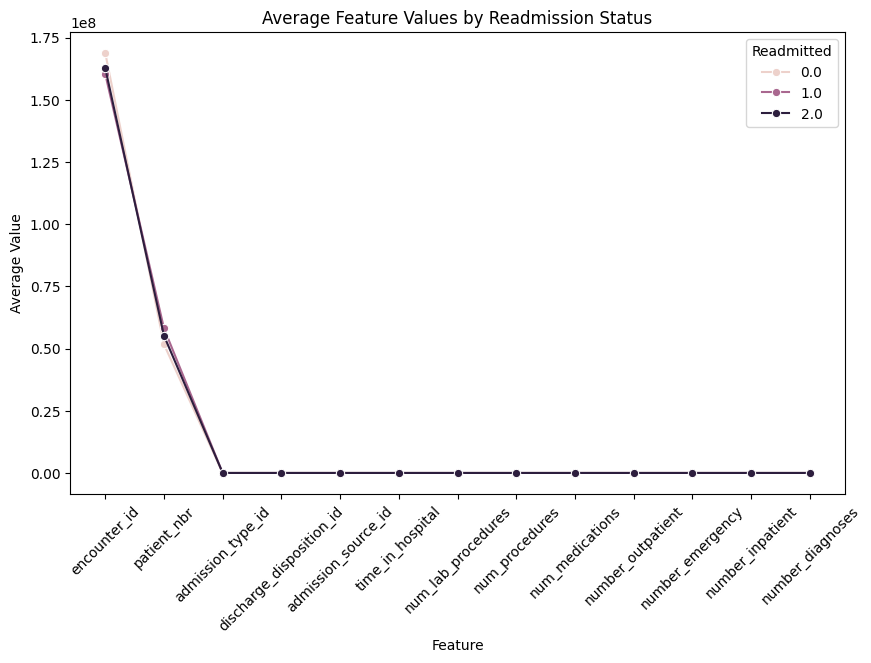

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=result_melted, x='feature', y='average_value', hue='readmitted', marker='o')
plt.title('Average Feature Values by Readmission Status')
plt.xlabel('Feature')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Readmitted')
plt.show()

Box Plot (for individual feature distributions)

> age

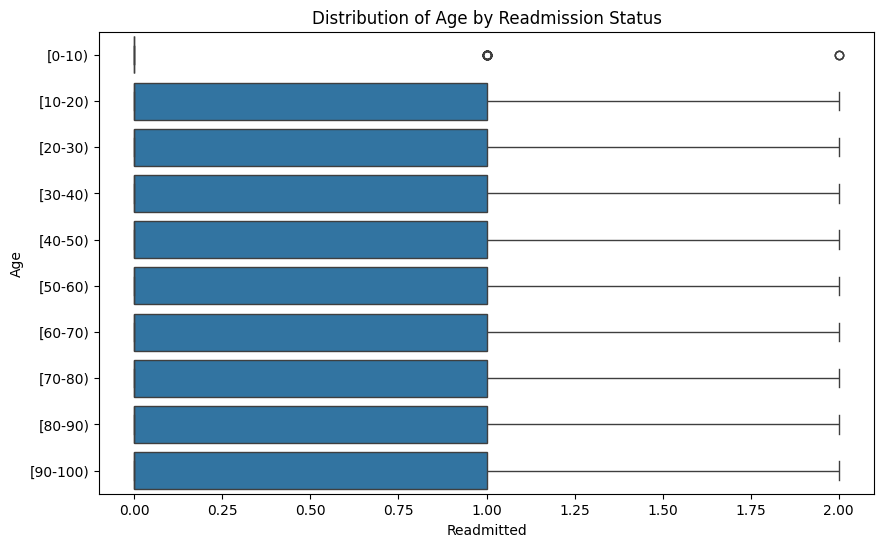

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='readmitted', y='age')  # Replace 'age' with any numeric feature
plt.title('Distribution of Age by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Age')
plt.show()

> insulin

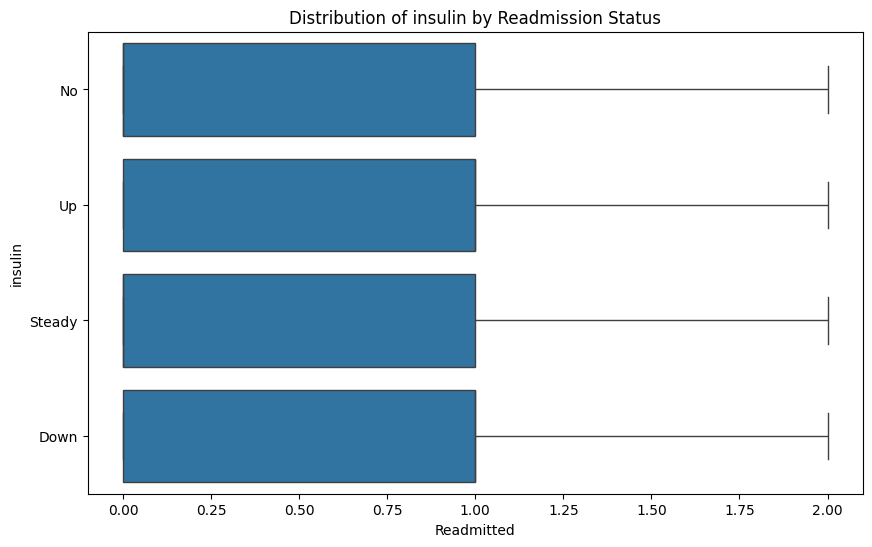

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='readmitted', y='insulin')  # Replace 'age' with any numeric feature
plt.title('Distribution of insulin by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('insulin')
plt.show()

#### <span style='color:green'>*Visualizing Basic Overview of the Data*</span>

##### <span style='color:green'>*1. Distribution of Target Variable*</span>

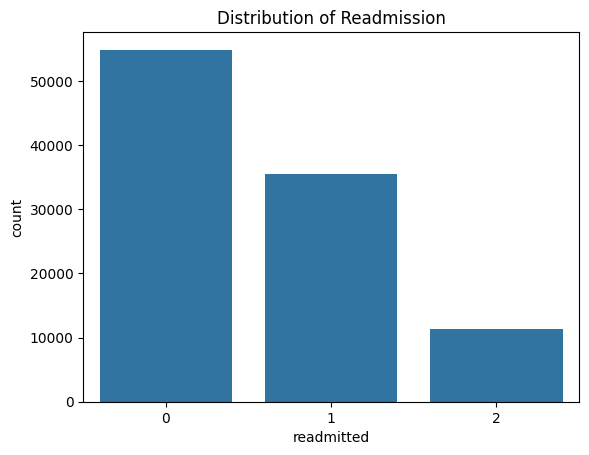

In [19]:
sns.countplot(x=df1['readmitted'])
plt.title("Distribution of Readmission")
plt.show()

##### <span style='color:green'>*2. Histogram of Numerical Features*</span>

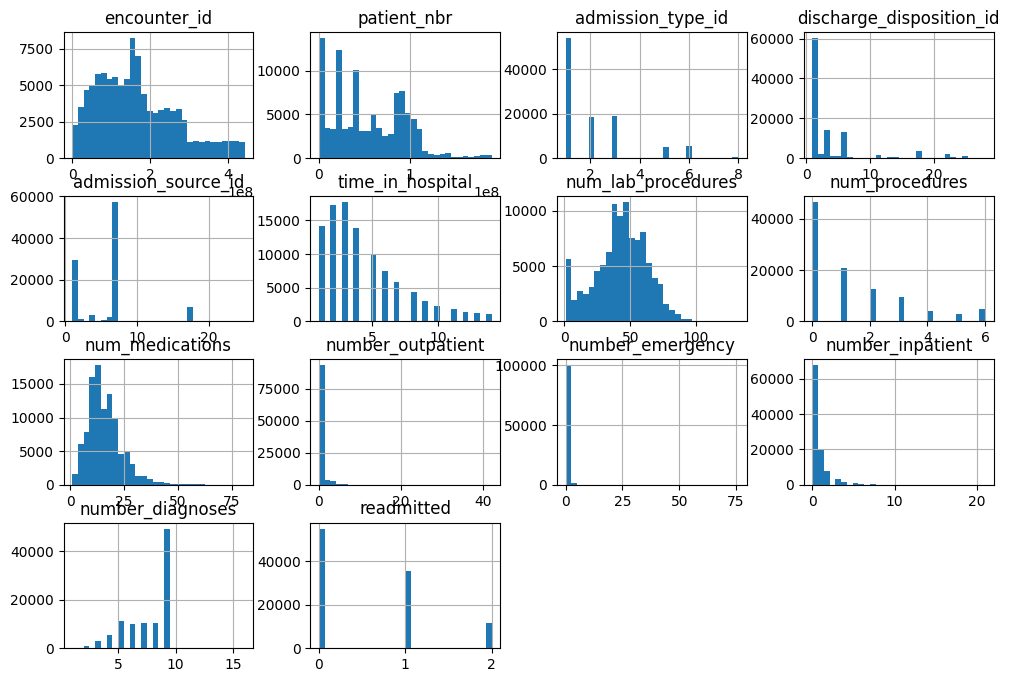

In [20]:
df1.hist(figsize=(12, 8), bins=30)
plt.show()


##### <span style='color:green'>*3. Heatmap*</span>

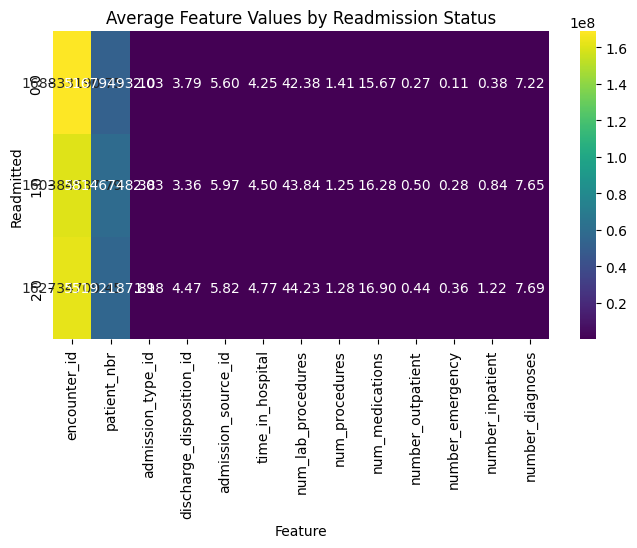

In [21]:
plt.figure(figsize=(8, 4))
sns.heatmap(result.set_index('readmitted'), annot=True, cmap='viridis', fmt='.2f')
plt.title('Average Feature Values by Readmission Status')
plt.xlabel('Feature')
plt.ylabel('Readmitted')
plt.show()


##### <span style='color:green'>*4. Outlier Detection*</span>

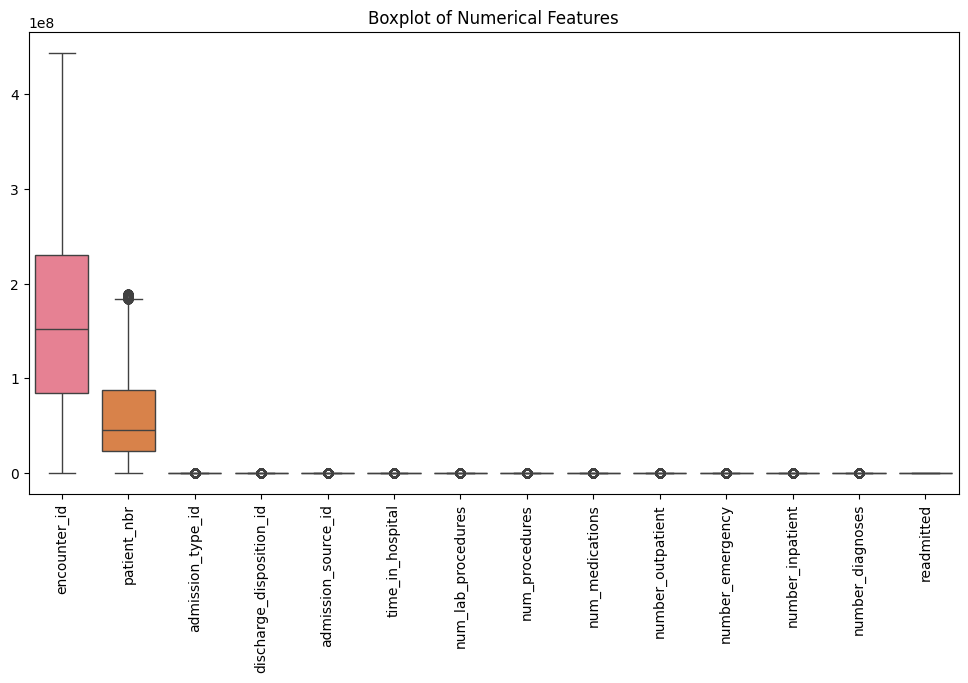

In [22]:
import seaborn as sns

# Boxplot for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()


<hr style="border: 1px solid green;">

### <span style="color:#32CD32">***Data Preprocessing***</span>

Convert Categorical columns to proper format

In [23]:

# Getting specific column data types

object_cols = df1.select_dtypes(include=['object']).columns
int_cols = df1.select_dtypes(include=['int64']).columns

# Print results
print("\nObject Columns:\n", object_cols.tolist())
print("\nInteger Columns:\n", int_cols.tolist())



Object Columns:
 ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

Integer Columns:
 ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']


In [24]:
#Label Encodin for Ordinal Categories
from sklearn.preprocessing import LabelEncoder

# Encode Age
age_map = {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, 
           '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9}
df1['age'] = df1['age'].map(age_map)

# Encode Weight (if needed)
weight_encoder = LabelEncoder()
df1['weight'] = weight_encoder.fit_transform(df1['weight'])


In [25]:
# Convert categorical Yes/No columns to 0/1
binary_cols = ['change', 'diabetesMed']
df1[binary_cols] = df1[binary_cols].apply(lambda x: x.map({'No': 0, 'Ch': 1, 'Yes': 1}))

# Apply One-Hot Encoding
one_hot_cols = ['race', 'gender', 'payer_code', 'medical_specialty']
df1 = pd.get_dummies(df1, columns=one_hot_cols, drop_first=True)

In [26]:
# Apply Label Encoding for Drug Response Columns
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
             'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
             'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
             'glipizide-metformin', 'glimepiride-pioglitazone', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

le = LabelEncoder()
for col in drug_cols:
    df1[col] = le.fit_transform(df1[col])

# Apply Frequency Encoding for Diagnoses
for col in ['diag_1', 'diag_2', 'diag_3']:
    df1[col] = df1[col].map(df1[col].value_counts(normalize=True))

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 140 entries, encounter_id to medical_specialty_Urology
dtypes: bool(96), float64(3), int64(41)
memory usage: 43.5 MB


handling bool dtype , converting them to integers (0 and 1) to ensure consistency

In [28]:
df1 = df1.astype({col: 'int64' for col in df1.select_dtypes(include=['bool']).columns})


<hr style="border: 1px solid green;">

#### <span style='color :green'> *Feature Selection*<span>

Since the dataset has been modified and contains int64 and float64, we will use ANOVA (f_classif) and Mutual Information (mutual_info_classif).

- High ANOVA scores indicate **strong linear relationships** with `readmitted`.  
- High Mutual Information scores indicate **non-linear relationships** with `readmitted`.  


In [29]:
#feature selection using ANOVA 
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
X = df1.drop(columns=["readmitted"])
y = df1["readmitted"]
X_features = X.select_dtypes(include=['int64', 'float64']).columns
X_num = X[X_features]

#ANOVA F-test
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_scores = anova_selector.fit(X_num, y).scores_

# Apply Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_scores = mi_selector.fit(X_num, y).scores_

# Combine results into a DataFrame
feature_scores = pd.DataFrame({
    "Feature": X_features,
    "ANOVA Score": anova_scores,
    "Mutual Info Score": mi_scores
}).sort_values(by="Mutual Info Score", ascending=False)  # Sort by importance

# Display top features
print(feature_scores)


c:\Users\Mbego John\.conda\envs\dtascnce\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [33 34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Mbego John\.conda\envs\dtascnce\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


                                               Feature  ANOVA Score  \
1                                          patient_nbr   306.244352   
13                                    number_inpatient  2963.323843   
5                             discharge_disposition_id   200.759651   
14                                              diag_1    84.764426   
15                                              diag_2    10.528281   
..                                                 ...          ...   
127  medical_specialty_Surgery-Cardiovascular/Thoracic    50.551848   
130            medical_specialty_Surgery-Maxillofacial     0.823936   
129                  medical_specialty_Surgery-General     1.154689   
128             medical_specialty_Surgery-Colon&Rectal     0.209872   
134  medical_specialty_Surgery-PlasticwithinHeadand...     0.931508   

     Mutual Info Score  
1             0.064580  
13            0.033375  
5             0.020709  
14            0.018526  
15            0.013726

- The results from **ANOVA (f_classif) and Mutual Information (mutual_info_classif)** provide insights into the relationship between each feature and the target variable (`readmitted`). 

- **ANOVA (f_classif)** measures how much each numerical feature contributes to explaining variance in the target, assuming a **linear relationship**. 
 
- However, it does not capture non-linear dependencies. On the other hand, **Mutual Information (MI)** evaluates both **linear and non-linear** relationships by measuring how much uncertainty in `readmitted` is reduced when knowing a particular feature. A higher MI score indicates a strong dependency between the feature and the target, even if the relationship is complex. By selecting features with high ANOVA and/or MI scores, we ensure that only the most informative predictors are used in the model, improving accuracy while reducing noise from irrelevant variables. 

- The below code therefore sets the threshold for both techniques, and removes the features doesnt relate closely with our target variable 

In [30]:

anova_threshold = 5  # Minimum acceptable ANOVA score
mi_threshold = 0.01  # Minimum acceptable Mutual Information score

# Select features that pass either threshold
selected_features = feature_scores[
    (feature_scores["ANOVA Score"] >= anova_threshold) | 
    (feature_scores["Mutual Info Score"] >= mi_threshold)
]

# Keep only the selected features in the dataset
X_selected = X[selected_features["Feature"].values]

# Display selected features
print("Selected Features:\n", selected_features)


Selected Features:
                                                Feature  ANOVA Score  \
1                                          patient_nbr   306.244352   
13                                    number_inpatient  2963.323843   
5                             discharge_disposition_id   200.759651   
14                                              diag_1    84.764426   
15                                              diag_2    10.528281   
..                                                 ...          ...   
86                        medical_specialty_Nephrology    39.574673   
82               medical_specialty_Hematology/Oncology     7.003760   
81                        medical_specialty_Hematology    17.592212   
110  medical_specialty_PhysicalMedicineandRehabilit...    11.377828   
127  medical_specialty_Surgery-Cardiovascular/Thoracic    50.551848   

     Mutual Info Score  
1             0.064580  
13            0.033375  
5             0.020709  
14            0.018526  
15

<hr style="border: 1px solid green;">

#### <span style='color :green'> *Class Imbalance*<span>

readmitted
0    54864
1    35545
2    11357
Name: count, dtype: int64


C:\Users\Mbego John\AppData\Local\Temp\ipykernel_14764\2949180970.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1["readmitted"], palette="coolwarm")


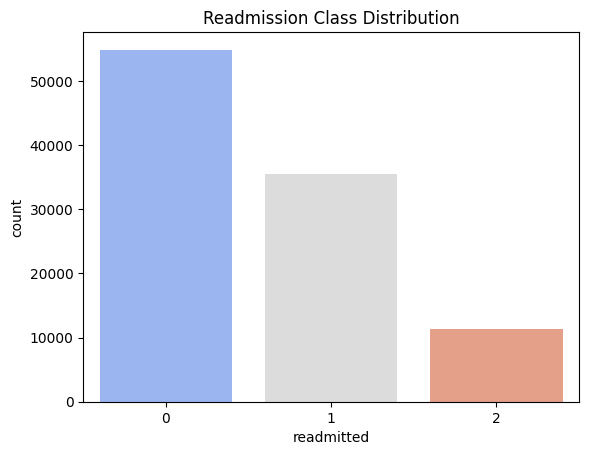

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check class distribution
print(df1["readmitted"].value_counts())

# Plot class distribution
sns.countplot(x=df1["readmitted"], palette="coolwarm")
plt.title("Readmission Class Distribution")
plt.show()

Class weight is used in machine learning models to address class imbalance by assigning higher importance to underrepresented classes. In models like Logistic Regression, Random Forest, or SVM in scikit-learn, class_weight="balanced" is set automatically to adjust weights based on class frequencies, or provide a dictionary specifying custom weights.

##### <span style='color :green'> *Define features and target*<span>

In [32]:

X = df1.drop(columns=["readmitted"])
y = df1["readmitted"]

<hr style="border: 1px solid green;">

### <span style='color :green'> *Modelling and Evaluation*<span>

#### <span style='color :green'> *1. logistic regression*<span>

=== Logistic Regression WITHOUT Class Weights ===
              precision    recall  f1-score   support

           0       0.55      0.91      0.69     10973
           1       0.45      0.15      0.22      7109
           2       0.00      0.00      0.00      2272

    accuracy                           0.54     20354
   macro avg       0.33      0.35      0.30     20354
weighted avg       0.45      0.54      0.45     20354

ROC-AUC Score: 0.5314223124519072


=== Logistic Regression WITH Class Weights ===
              precision    recall  f1-score   support

           0       0.58      0.60      0.59     10973
           1       0.40      0.50      0.45      7109
           2       0.10      0.01      0.02      2272

    accuracy                           0.50     20354
   macro avg       0.36      0.37      0.35     20354
weighted avg       0.47      0.50      0.48     20354

ROC-AUC Score: 0.5486362128267307


c:\Users\Mbego John\.conda\envs\dtascnce\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mbego John\.conda\envs\dtascnce\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mbego John\.conda\envs\dtascnce\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

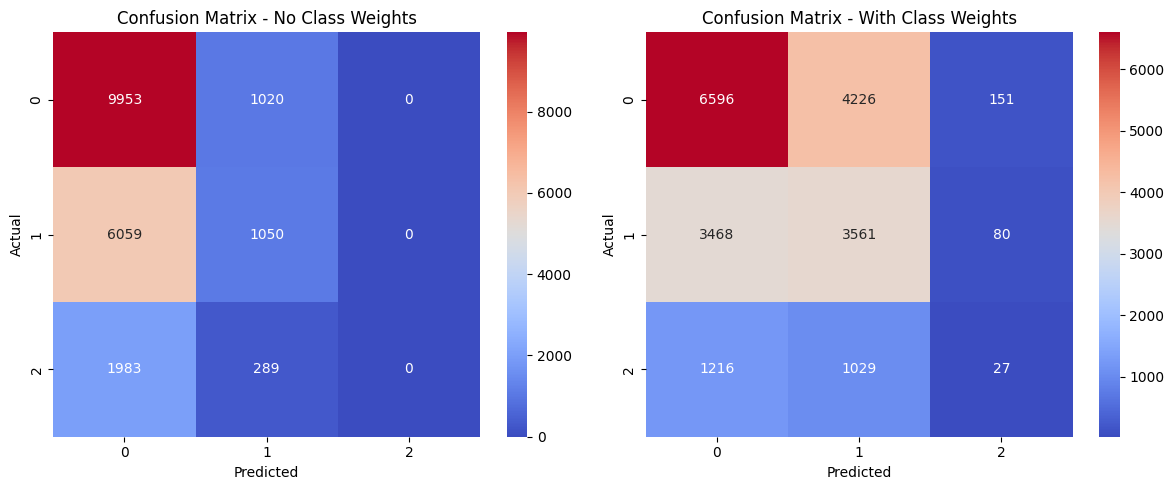

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression WITHOUT class weights
model_no_weights = LogisticRegression(random_state=42)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

# Train Logistic Regression WITH class weights
LogicR_model = LogisticRegression(class_weight="balanced", random_state=42)
LogicR_model.fit(X_train, y_train)
y_pred_with_weights = LogicR_model.predict(X_test)

# Compute probabilities for ROC-AUC
y_prob_no_weights = model_no_weights.predict_proba(X_test)
y_prob_with_weights = LogicR_model.predict_proba(X_test)

# Print Evaluation Metrics
print("=== Logistic Regression WITHOUT Class Weights ===")
print(classification_report(y_test, y_pred_no_weights))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_no_weights, multi_class="ovr"))
print("\n")

print("=== Logistic Regression WITH Class Weights ===")
print(classification_report(y_test, y_pred_with_weights))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_with_weights, multi_class="ovr"))

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix without class weights
sns.heatmap(confusion_matrix(y_test, y_pred_no_weights), annot=True, fmt="d", cmap="coolwarm", ax=axes[0])
axes[0].set_title("Confusion Matrix - No Class Weights")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion matrix with class weights
sns.heatmap(confusion_matrix(y_test, y_pred_with_weights), annot=True, fmt="d", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Confusion Matrix - With Class Weights")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


#### <span style='color :green'> *2. Random Forest Classifier*<span>

In [34]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier

# Get unique classes
classes = np.unique(y_train)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print("Computed Class Weights:", class_weight_dict)

Rfc_model = RandomForestClassifier(class_weight=class_weight_dict)
Rfc_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = Rfc_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy:.4f}")

# Print classification report (precision, recall, F1-score)
print("Classification Report:\n",classification_report(y_test,y_pred))

# Print confusion matrix
print ("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))


Computed Class Weights: {np.int64(0): np.float64(0.6182892468463542), np.int64(1): np.float64(0.9543301917756835), np.int64(2): np.float64(2.9870482480278846)}
Accuracy : 0.5989
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.87      0.72     10973
           1       0.54      0.37      0.44      7109
           2       0.35      0.01      0.02      2272

    accuracy                           0.60     20354
   macro avg       0.50      0.42      0.39     20354
weighted avg       0.56      0.60      0.55     20354

Confusion Matrix:
 [[9505 1457   11]
 [4418 2665   26]
 [1424  828   20]]


evaluating RandomForestClassifier

#### <span style='color :green'> *3. XGBoost*<span>

In [35]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Compute class weights
classes = np.unique(y_train)
class_weight_values = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weight_values))

# Convert class weights to a scale for XGBoost
sample_weights = np.array([class_weight_dict[label] for label in y_train])

# Define and train the XGBoost model
XGB_model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(classes), eval_metric="mlogloss")
XGB_model.fit(X_train, y_train, sample_weight=sample_weights)



# Make predictions
y_pred = XGB_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Compute ROC-AUC only for multi-class classification
if len(classes) > 2:
    model_proba = xgb.XGBClassifier(objective="multi:softprob", num_class=len(classes))
    model_proba.fit(X_train, y_train, sample_weight=sample_weights)
    y_prob = model_proba.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy: 0.5439
ROC-AUC Score: 0.6977
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.61      0.66     10973
           1       0.50      0.50      0.50      7109
           2       0.21      0.37      0.27      2272

    accuracy                           0.54     20354
   macro avg       0.48      0.49      0.48     20354
weighted avg       0.59      0.54      0.56     20354

Confusion Matrix:
 [[6670 2706 1597]
 [1946 3565 1598]
 [ 613  823  836]]


#### <span style='color :green'> *All three models in comparison and results analysis*<span>

In [36]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score

# Make predictions for each model
y_pred_lr = LogicR_model.predict(X_test)
y_pred_xgb = XGB_model.predict(X_test)
y_pred_rfc = Rfc_model.predict(X_test)

# Compute accuracy for each model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

# Initialize an empty dictionary to store results
results = {
    "Model": ["Logistic Regression", "XGBoost", "Random Forest"],
    "Accuracy": [accuracy_lr, accuracy_xgb, accuracy_rfc]
}

# Compute ROC-AUC only for multi-class classification
if len(np.unique(y_test)) > 2:
    y_prob_lr = LogicR_model.predict_proba(X_test)
    y_prob_xgb = XGB_model.predict_proba(X_test)
    y_prob_rfc = Rfc_model.predict_proba(X_test)
    
    roc_auc_lr = roc_auc_score(y_test, y_prob_lr, multi_class="ovr")
    roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb, multi_class="ovr")
    roc_auc_rfc = roc_auc_score(y_test, y_prob_rfc, multi_class="ovr")
    
    results["ROC-AUC"] = [roc_auc_lr, roc_auc_xgb, roc_auc_rfc]

# Create DataFrame
results_df = pd.DataFrame(results)

# Display table
print(results_df)


                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.500344  0.548636
1              XGBoost  0.543923  0.697734
2        Random Forest  0.598899  0.682197





#### <span style='color :green'> *1. Logistic Regression (Baseline Model)*<span>

- ***Accuracy (50.03%)***: This is close to random guessing, indicating that the model might not be capturing patterns well.  
- ***ROC-AUC (0.5486)***: A value slightly above 0.5 suggests poor discriminatory power, meaning the model struggles to distinguish between classes effectively.  
- ***Interpretation***: This may be due to linear assumptions in the model, which might not be suitable for complex patterns in the data.

##### <span style='color :green'> *2. XGBoost (Best ROC-AUC Score: 0.6977)*<span>

- ***Accuracy (54.39%)***: Better than Logistic Regression but still moderate.  
- ***ROC-AUC (0.6977)***: Indicates that XGBoost has the best ability to differentiate between classes, suggesting it captures underlying patterns more effectively than the other models.  
- ***Interpretation***: XGBoost's ability to handle non-linear relationships and interactions likely contributes to its superior performance.

##### <span style='color :green'> *3. Random Forest (Best Accuracy: 59.76%)*<span>

- ***Accuracy (59.76%)***: The highest among the three models, suggesting that Random Forest makes more correct predictions overall.  
- ***ROC-AUC (0.6831)***: Slightly lower than XGBoost but still significantly better than Logistic Regression.  
- ***Interpretation***: Random Forest seems to provide a good balance between accuracy and discriminative power, benefiting from its ensemble nature.

#### <span style='color :green'> *In Conclusion*<span>  
- ***XGBoost is the best model in terms of ROC-AUC***, meaning it provides the best class separation.  
- ***Random Forest has the highest accuracy***, meaning it makes the most correct predictions overall.  
- ***Logistic Regression performs poorly***, suggesting the dataset is not well-suited for a simple linear model.  



<hr style="border: 1px solid green;">